In [2]:
import os, sys, json
sys.path.append("../")  # add parent directory to the system path
from utils_data import *
from utils_model import *


In [5]:
# load the saved best model
best_model_0 = tf.keras.models.load_model(
    "save_best_models/best_model_mobilenet_test17.h5"
)


file_path = "/home/hoangng/Projects/Bird_classification/Research/output/data"
file_name = "model_performance_log_mobilenet_finetune5.json"
full_path = os.path.join(file_path, file_name)

with open(full_path, "r") as file:
    metrics = json.load(file)

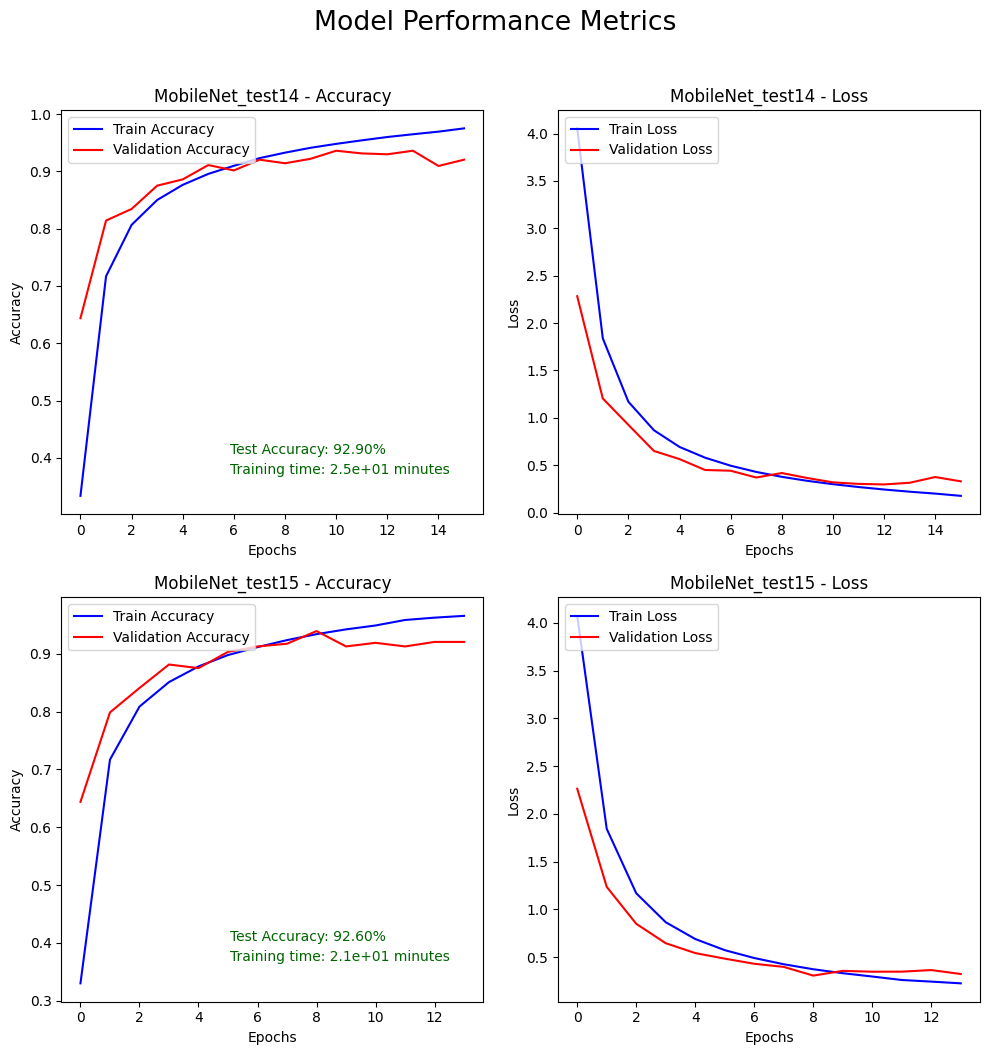

In [6]:
nrows = len(metrics)
ncols = 2
width = 10
height = nrows * width / ncols
figure = visualize_metric(metrics, nrows=nrows, ncols=ncols, figsize=(width, height))

In [ ]:
# assign the last 10 layers to be trainable
last_10_layers = model_0.layers[-15:]
for layer in last_10_layers:
    layer.trainable = True


# recompile the model to apply fine tuning changes
model_0.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001 * 0.1),
    metrics=["accuracy"],
)

model_0.summary()

1


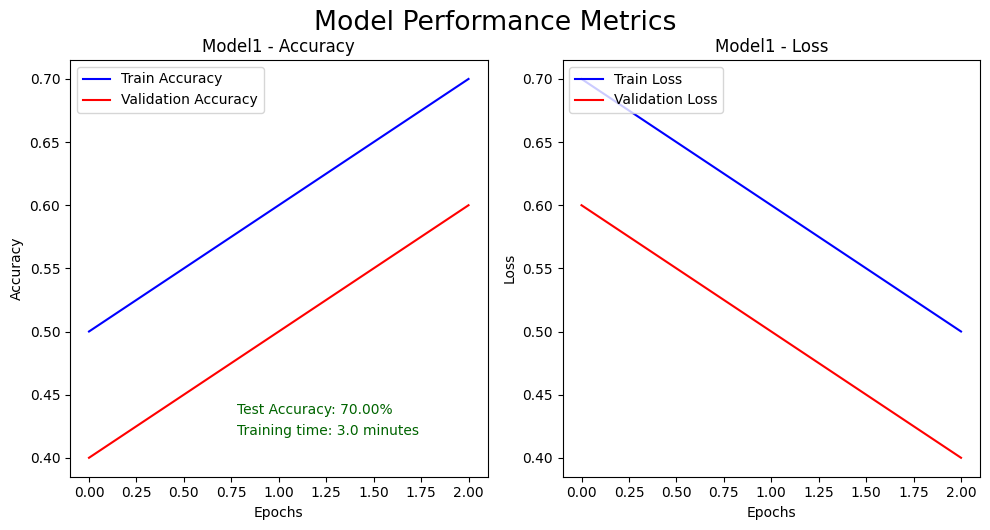

In [7]:
# path = "/home/hoangng/Projects/Bird_classification/Research/output/data/"
# file_name = "model_performance_log_mobilenet_finetune4.json"

metrics = {
    'Model1': {
        'train_accuracy': [0.5, 0.6, 0.7],
        'val_accuracy': [0.4, 0.5, 0.6],
        'test_accuracy': 0.7,
        'train_loss': [0.7, 0.6, 0.5],
        'val_loss': [0.6, 0.5, 0.4],
        'execution_time': 180
    }
}

# loaded_metrics = load_dict_from_json(file_name, path)
nrows = 1
ncols = 2
width = 10
height = nrows * width/ncols
print(nrows)

figure = visualize_metric(metrics, nrows=nrows, ncols=ncols, figsize=(width, height))